# Trabajo Práctico 1

Para esta primera entrega buscaremos generar un primer acercamiento a la base de datos con la que contamos.

Por un lado, veremos qué métodos podemos implementar para una primera visualización del contenido de nuestros datos, trabajar las características generales, pero también similitudes y diferencias entre los dos tipos de foros, entre posteos y comentarios, etc.

Posibles entradas a la base:

- Cantidad de caracteres/palabras
- Temporalidad de publicaciones y comentarios
- Cantidad de usuarios y nivel de actividad
- Términos frecuentes

Estas tareas nos ayudarán a comprender mejor el dataset con el que contamos, detectar situaciones que ameriten trabajos de curación, e imaginar fortalezas y obstáculos para futuras tareas de clasificación o clustering.


### Cargando el dataset:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re

In [12]:
url = 'https://raw.githubusercontent.com/patriciof3/mentoria13_famaf_2024/main/df_reddit_mentoria.csv'

df = pd.read_csv(url)

len(df)

3147

In [16]:
df.head(5)

,subreddit,created_utc,title_post,content,permalink,author,num_comments,id,type,is_submitter,score
0,ansiedad,2020-07-09 03:30:23,r/ansiedad Lounge,A place for members of r/ansiedad to chat with...,/r/ansiedad/comments/hny6f1/ransiedad_lounge/,Doxastico,0.0,hny6f1,post,NaN,NaN
1,ansiedad,2020-07-09 21:05:12,UNA GUÍA PARA CALMAR TU ANSIEDAD 😌🙇‍♂️,NaN,/r/ansiedad/comments/hoeibx/una_guía_para_calm...,YouTubeChevereIdioma,1.0,hoeibx,post,NaN,NaN
2,ansiedad,2020-10-19 19:13:08,Tip para controlar la ansiedad,Hola comunidad de internet.Paso para dejar un ...,/r/ansiedad/comments/jec5c5/tip_para_controlar...,psiconnect,0.0,jec5c5,post,NaN,NaN
3,ansiedad,2020-12-11 14:43:55,Recurso de psicología: Manual de propósitos 2021,Hace poco encontré este recurso navegando por ...,/r/ansiedad/comments/kb7fgp/recurso_de_psicolo...,juanxo7182,0.0,kb7fgp,post,NaN,NaN
4,ansiedad,2021-01-16 08:19:37,Ansiedad por sueños,[removed],/r/ansiedad/comments/kyh8yc/ansiedad_por_sueños/,Xbenzs,0.0,kyh8yc,post,NaN,NaN


### Temporalidad

<AxesSubplot:title={'center':'Frecuencia de entradas - r/ansiedad'}, xlabel='date'>

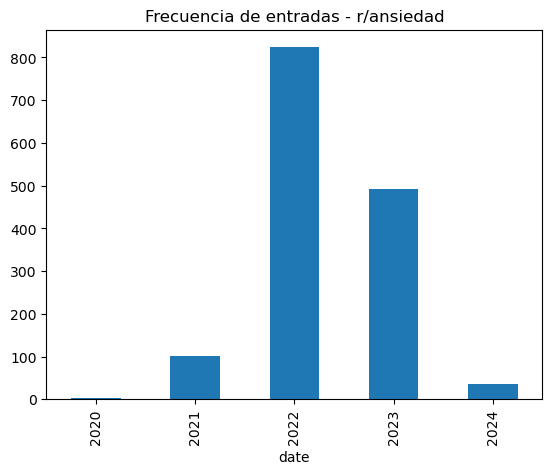

In [20]:
# Temporalidad
df["date"] = df["created_utc"].astype("datetime64")

df["content"][df["subreddit"] == "ansiedad"].groupby(df["date"].dt.year).count().plot(kind="bar", legend=False, title="Frecuencia de entradas - r/ansiedad")

### Caracteres

In [33]:
# crear columna con cantidad de caracteres de cada entrada

df['characters'] = df['content'].str.len()

df[["content", "characters"]].head(5)

,content,characters
0,A place for members of r/ansiedad to chat with...,57.0
1,NaN,NaN
2,Hola comunidad de internet.Paso para dejar un ...,996.0
3,Hace poco encontré este recurso navegando por ...,646.0
4,[removed],9.0


### Frecuencia de Términos

In [30]:
# convertir contenido en minúsculas, dar formato string y eliminar caracteres especiales
df['cleaned_content'] = df['content'].str.lower()

df['cleaned_content'] = df['cleaned_content'].astype('str') 

df['cleaned_content'] = df['cleaned_content'].apply(lambda x: re.sub(r'[^a-zA-Z\sáéíóúüñÁÉÍÓÚÜÑ]', '', x))

In [31]:
# cargar modelo de español de spacy
nlp = spacy.load("es_core_news_sm")

# definir stop words
stop_words = spacy.lang.es.stop_words.STOP_WORDS

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text.lower() not in stop_words]
    return ' '.join(tokens)


df['cleaned_content'] = df['cleaned_content'].apply(preprocess_text)

<Figure size 1000x600 with 0 Axes>

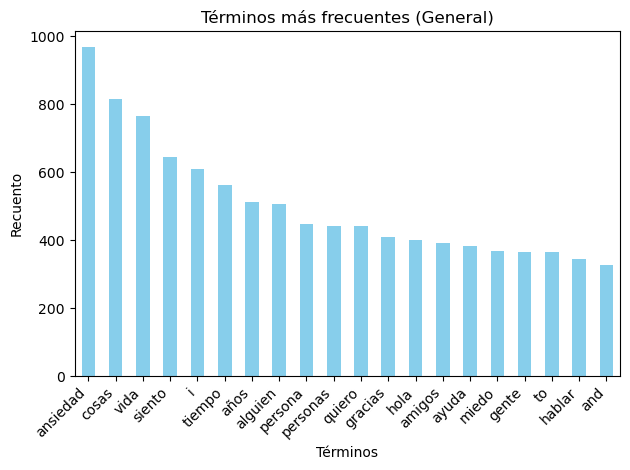

In [32]:
# Frecuencia de términos
word_freq = pd.Series(' '.join(df['cleaned_content']).split()).value_counts()
a = pd.DataFrame(word_freq).head(20)

plt.figure(figsize=(10, 6))
a.plot(kind='bar', color='skyblue', legend=False)
plt.title('Términos más frecuentes (General)')
plt.xlabel('Términos')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()